In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#K Nearest Neighbor
df = pd.read_excel("/content/Data set.xlsx", 2)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df1 = df.drop(['fnlwgt', 'education', 'capital-gain', 'capital-loss',], axis= 1)
df1

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,13,Divorced,Prof-specialty,Not-in-family,White,Female,36,United-States,<=50K.
48838,64,NaN,9,Widowed,NaN,Other-relative,Black,Male,40,United-States,<=50K.
48839,38,Private,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,50,United-States,<=50K.
48840,44,Private,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,40,United-States,<=50K.


In [ ]:
df1.replace('?', pd.NA, inplace=True)
df1.fillna(method = 'ffill', inplace=True)
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [ ]:
df1["income"].value_counts()

<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: income, dtype: int64

In [ ]:
df1.replace('>50K.', '>50K', inplace=True)
df1.replace('<=50K.', '<=50K', inplace=True)
df1.reset_index(drop=True, inplace=True)

In [ ]:
df1["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
df1.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['marital-status'] = le.fit_transform(df1['marital-status'])
df1['occupation'] = le.fit_transform(df1['occupation'])
df1['relationship'] = le.fit_transform(df1['relationship'])
df1['race'] = le.fit_transform(df1['race'])
df1['sex'] = le.fit_transform(df1['sex'])
df1['native-country'] = le.fit_transform(df1['native-country'])
df1['income'] = le.fit_transform(df1['income'])
df1['workclass'] = le.fit_transform(df1['workclass'])

In [ ]:
df1.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,6,13,4,0,1,4,1,40,38,0
1,50,5,13,2,3,0,4,1,13,38,0
2,38,3,9,0,5,1,4,1,40,38,0
3,53,3,7,2,5,0,2,1,40,38,0
4,28,3,13,2,9,5,2,0,40,4,0


<Axes: >

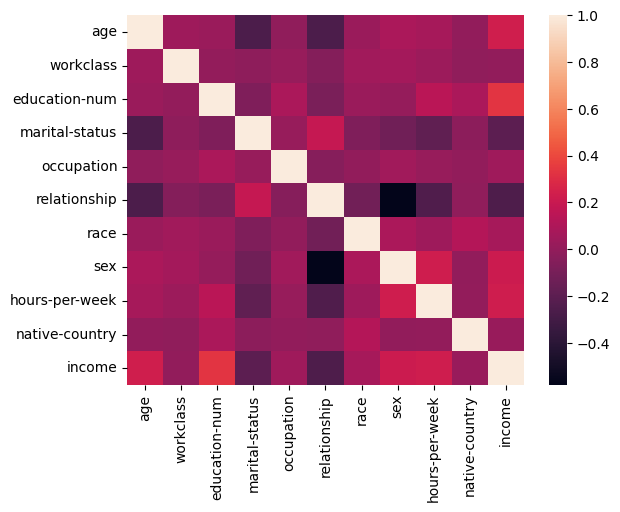

In [ ]:
sns.heatmap(df1.corr())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df1[['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'native-country',]]
y = df1['income']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)


In [ ]:
len(x_test)

9769

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
knn.score(x_test, y_test)

0.7935305558399017

In [ ]:
predictions = knn.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, predictions))

Accuracy: 0.7935305558399017
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7430
           1       0.63      0.34      0.44      2339

    accuracy                           0.79      9769
   macro avg       0.72      0.64      0.66      9769
weighted avg       0.77      0.79      0.77      9769



In [ ]:
# SVM

from sklearn.svm import SVC
model = SVC()

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:
model.score(x_test, y_test)

0.8098065308629337

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8098065308629337

In [ ]:
# Decision tree
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [ ]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

[Text(0.5, 0.875, 'x[5] <= 0.5\nentropy = 0.794\nsamples = 39073\nvalue = [29725, 9348]'),
 Text(0.25, 0.625, 'x[2] <= 12.5\nentropy = 0.993\nsamples = 15719\nvalue = [8616, 7103]'),
 Text(0.125, 0.375, 'x[2] <= 8.5\nentropy = 0.921\nsamples = 11012\nvalue = [7315, 3697]'),
 Text(0.0625, 0.125, 'entropy = 0.562\nsamples = 1824\nvalue = [1584, 240]'),
 Text(0.1875, 0.125, 'entropy = 0.955\nsamples = 9188\nvalue = [5731, 3457]'),
 Text(0.375, 0.375, 'x[8] <= 31.5\nentropy = 0.85\nsamples = 4707\nvalue = [1301, 3406]'),
 Text(0.3125, 0.125, 'entropy = 0.923\nsamples = 296\nvalue = [196, 100]'),
 Text(0.4375, 0.125, 'entropy = 0.812\nsamples = 4411\nvalue = [1105, 3306]'),
 Text(0.75, 0.625, 'x[5] <= 4.5\nentropy = 0.457\nsamples = 23354\nvalue = [21109, 2245]'),
 Text(0.625, 0.375, 'x[2] <= 12.5\nentropy = 0.345\nsamples = 21496\nvalue = [20108, 1388]'),
 Text(0.5625, 0.125, 'entropy = 0.21\nsamples = 17128\nvalue = [16559, 569]'),
 Text(0.6875, 0.125, 'entropy = 0.696\nsamples = 4368\nva

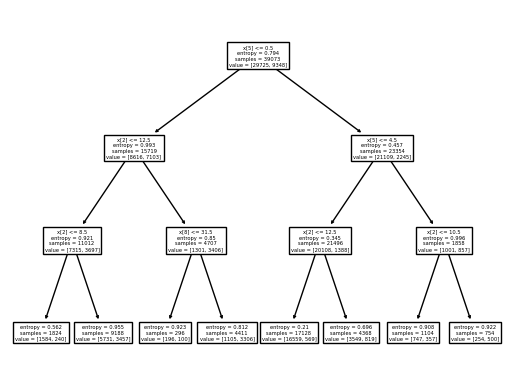

In [ ]:
tree.plot_tree(model)

In [ ]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()
preds

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
pd.crosstab(y_test,preds)

col_0,0,1
income,,
0,7086,344
1,1387,952


In [ ]:
np.mean(preds==y_test)

0.8228068379568021

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
model.score(x_test, y_test)

0.8174838775719111

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[6707,  723],
       [1060, 1279]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8174838775719111

In [ ]:
# K means
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(x_train)
y_predicted

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int32)